In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import itertools

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

df = pd.read_csv("../dataset_final_bartek.csv")
df.head()

"""
Sezonowość miesięczna nie może zostać wykryta, ponieważ dane mają charakter roczny.
W zamian analizowana jest cykliczność wieloletnia oraz występowanie epizodów epidemiczych.
"""

'\nSezonowość miesięczna nie może zostać wykryta, ponieważ dane mają charakter roczny.\nW zamian analizowana jest cykliczność wieloletnia oraz występowanie epizodów epidemiczych.\n'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      3043 non-null   int64  
 1   Country                   3043 non-null   object 
 2   Disease                   3043 non-null   object 
 3   Cases                     2919 non-null   float64
 4   Population                3043 non-null   float64
 5   Incidence                 2919 non-null   float64
 6   Pop_Structure_0_14_Pct    3043 non-null   float64
 7   Vaccination_Coverage_Pct  3043 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 190.3+ KB


In [6]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,Year,Cases,Population,Incidence,Pop_Structure_0_14_Pct,Vaccination_Coverage_Pct
count,"3,043","2,919","3,043","2,919","3,043","3,043"
mean,"2,011","1,637","16,527,355",12,15,93
std,8,"3,662","22,211,303",21,1,2
min,"1,995",0,"30,629",0,13,90
25%,"2,005",15,"2,410,018",0,15,93
50%,"2,012",271,"7,518,002",5,15,93
75%,"2,018","1,338","16,357,992",14,15,93
max,"2,025","55,399","83,456,045",296,18,98


In [7]:
"""Wnioski:

Średnia zachorowalność (Incidence) wynosi ok. 12.2, jednak mediana to jedynie 5.19, co wskazuje na silną prawostronną skośność rozkładu.

Maksymalna wartość Incidence (~296) znacząco odbiega od wartości typowych, co sugeruje występowanie epizodów epidemicznych.

Poziom wyszczepienia jest wysoki i stabilny (średnio 93.4%, odchylenie standardowe ~1.5).

Struktura populacji w wieku 0–14 lat wykazuje niewielką zmienność, co oznacza porównywalną demografię między krajami.

📌 Znaczenie analityczne:
Rozkłady nie są symetryczne → klasyczne średnie należy interpretować ostrożnie."""

'Wnioski:\n\nŚrednia zachorowalność (Incidence) wynosi ok. 12.2, jednak mediana to jedynie 5.19, co wskazuje na silną prawostronną skośność rozkładu.\n\nMaksymalna wartość Incidence (~296) znacząco odbiega od wartości typowych, co sugeruje występowanie epizodów epidemicznych.\n\nPoziom wyszczepienia jest wysoki i stabilny (średnio 93.4%, odchylenie standardowe ~1.5).\n\nStruktura populacji w wieku 0–14 lat wykazuje niewielką zmienność, co oznacza porównywalną demografię między krajami.\n\n📌 Znaczenie analityczne:\nRozkłady nie są symetryczne → klasyczne średnie należy interpretować ostrożnie.'

In [8]:
df.isna().sum()

Year                          0
Country                       0
Disease                       0
Cases                       124
Population                    0
Incidence                   124
Pop_Structure_0_14_Pct        0
Vaccination_Coverage_Pct      0
dtype: int64

In [9]:
"""Wnioski:

Braki danych występują wyłącznie w zmiennych Cases i Incidence (124 obserwacje).

Pozostałe zmienne są kompletne (0 braków).

Braki prawdopodobnie wynikają z braku raportowania przypadków, a nie z błędów danych.

📌 Znaczenie analityczne:
Dane są wysokiej jakości; braki są logiczne i ograniczone."""

'Wnioski:\n\nBraki danych występują wyłącznie w zmiennych Cases i Incidence (124 obserwacje).\n\nPozostałe zmienne są kompletne (0 braków).\n\nBraki prawdopodobnie wynikają z braku raportowania przypadków, a nie z błędów danych.\n\n📌 Znaczenie analityczne:\nDane są wysokiej jakości; braki są logiczne i ograniczone.'

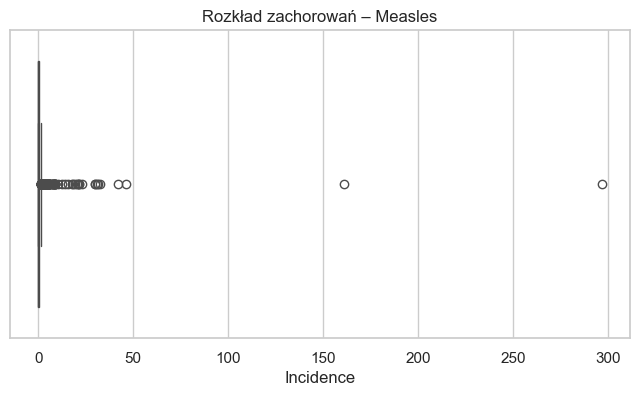

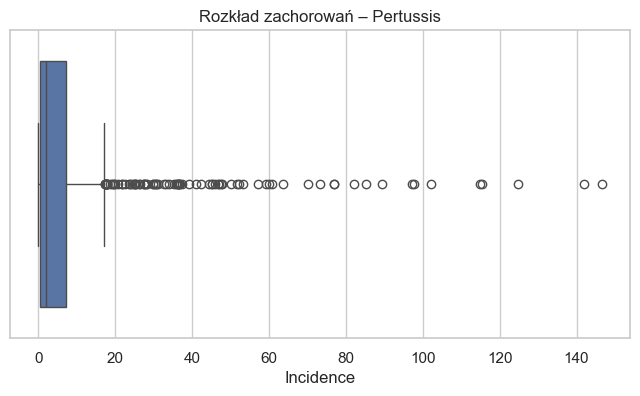

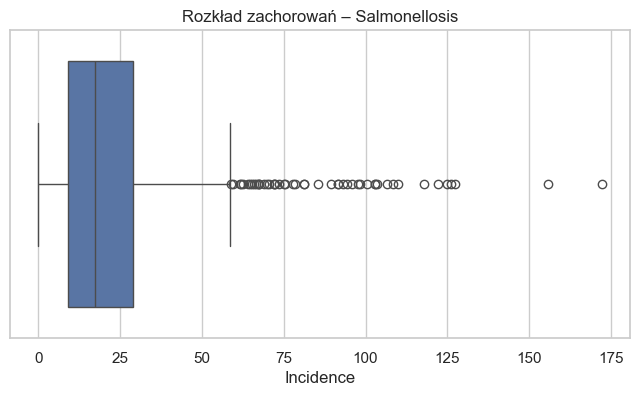

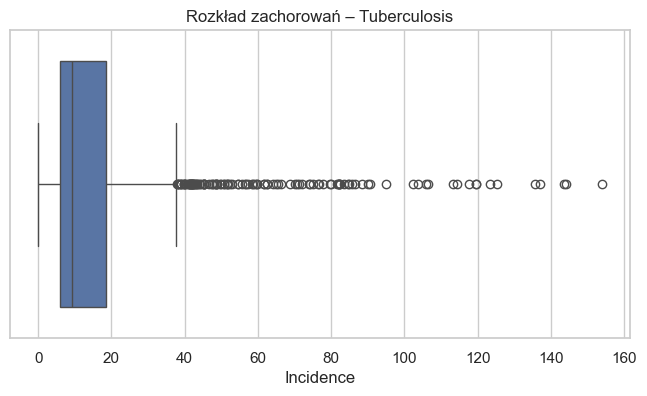

In [4]:
df = pd.read_csv("../dataset_final_bartek.csv")
diseases = df["Disease"].unique()
for disease in diseases:
    plt.figure(figsize=(8,4))
    sns.boxplot(
        data=df[df["Disease"] == disease],
        x="Incidence"
    )
    plt.title(f"Rozkład zachorowań – {disease}")
    plt.xlabel("Incidence")
    plt.show()

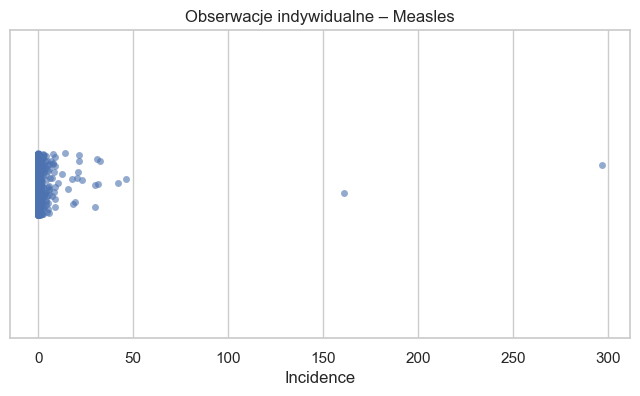

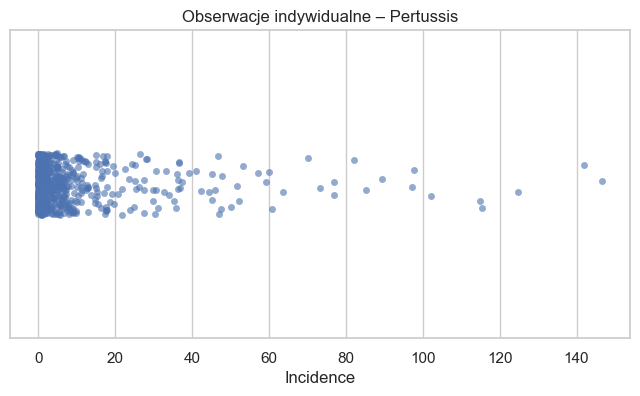

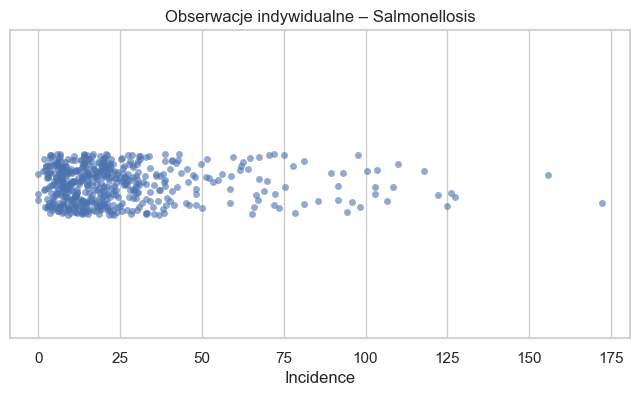

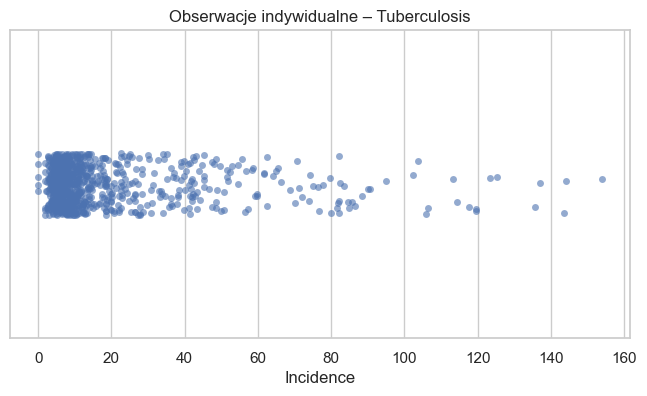

In [5]:
for disease in diseases:
    plt.figure(figsize=(8,4))
    sns.stripplot(
        data=df[df["Disease"] == disease],
        x="Incidence",
        jitter=True,
        alpha=0.6
    )
    plt.title(f"Obserwacje indywidualne – {disease}")
    plt.xlabel("Incidence")
    plt.show()

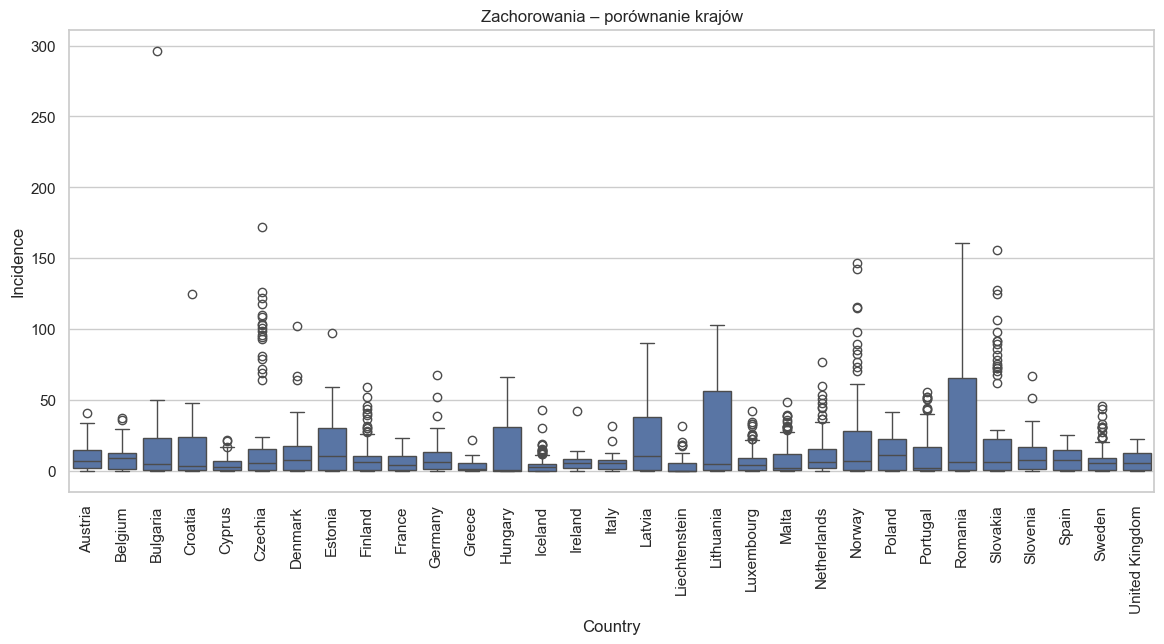

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Country", y="Incidence")
plt.xticks(rotation=90)
plt.title("Zachorowania – porównanie krajów")
plt.show()

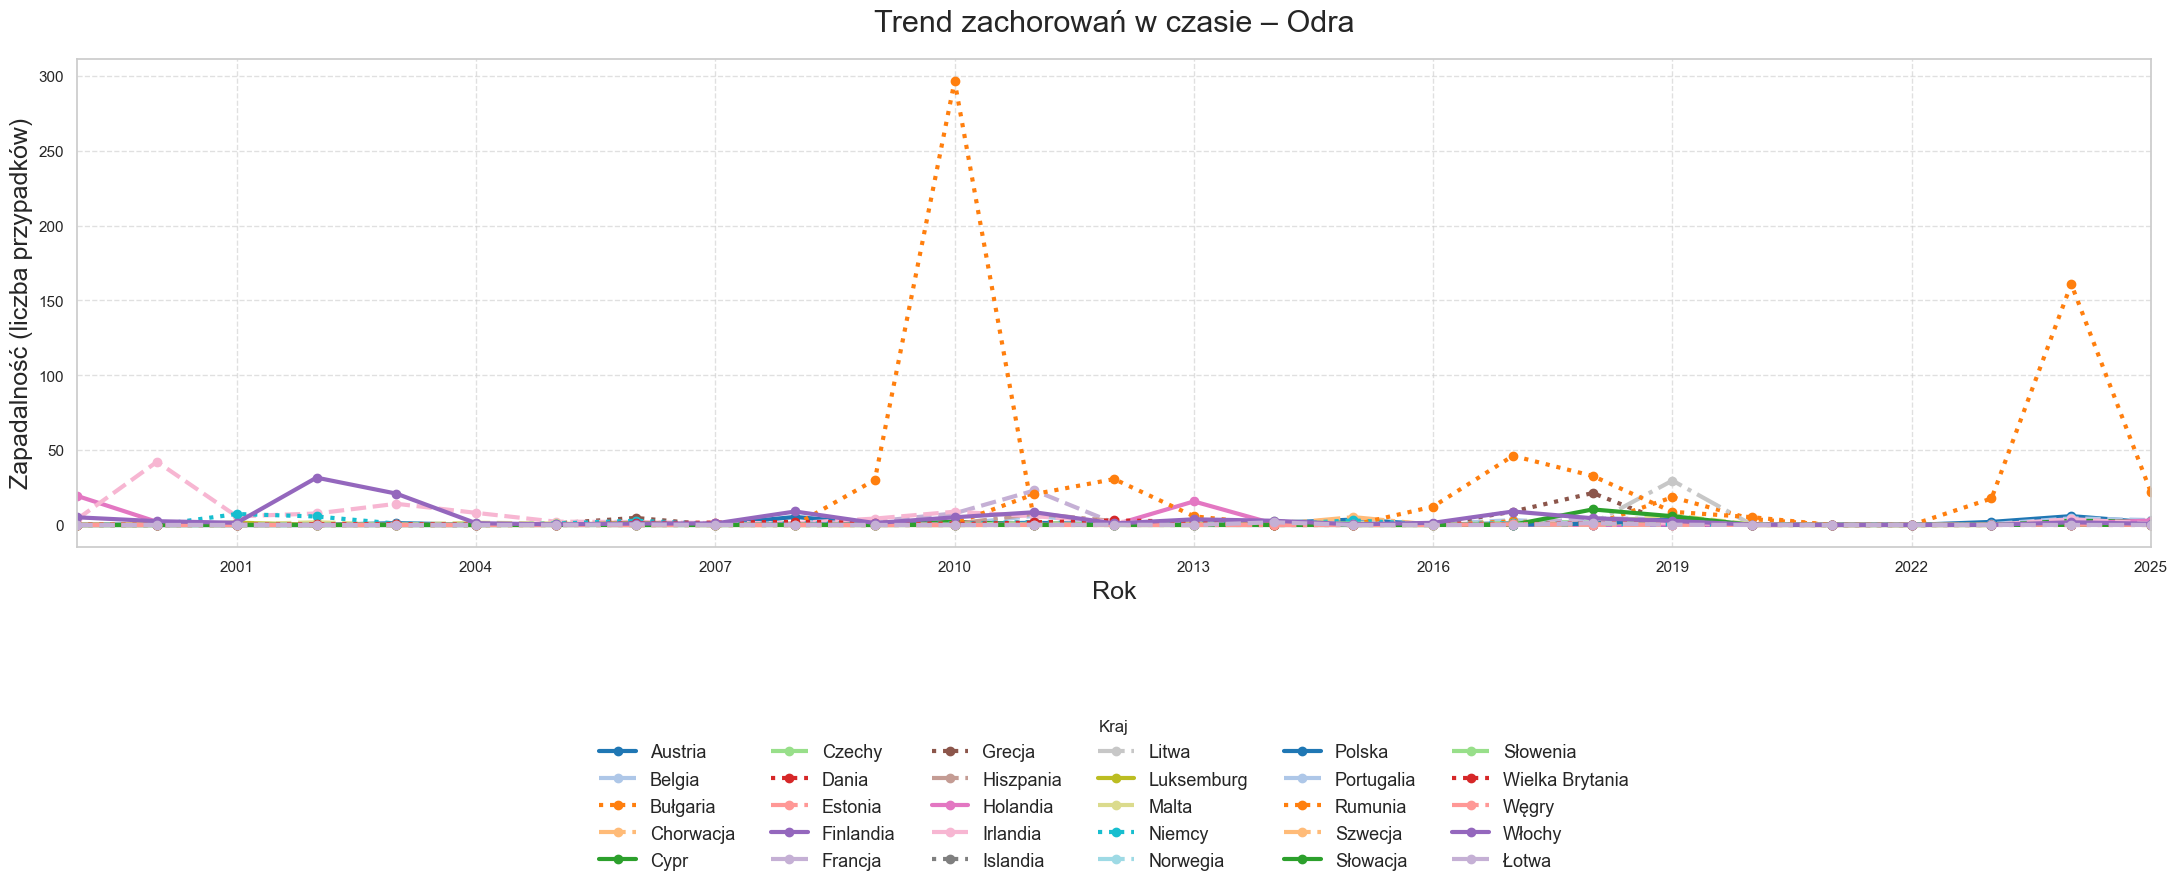

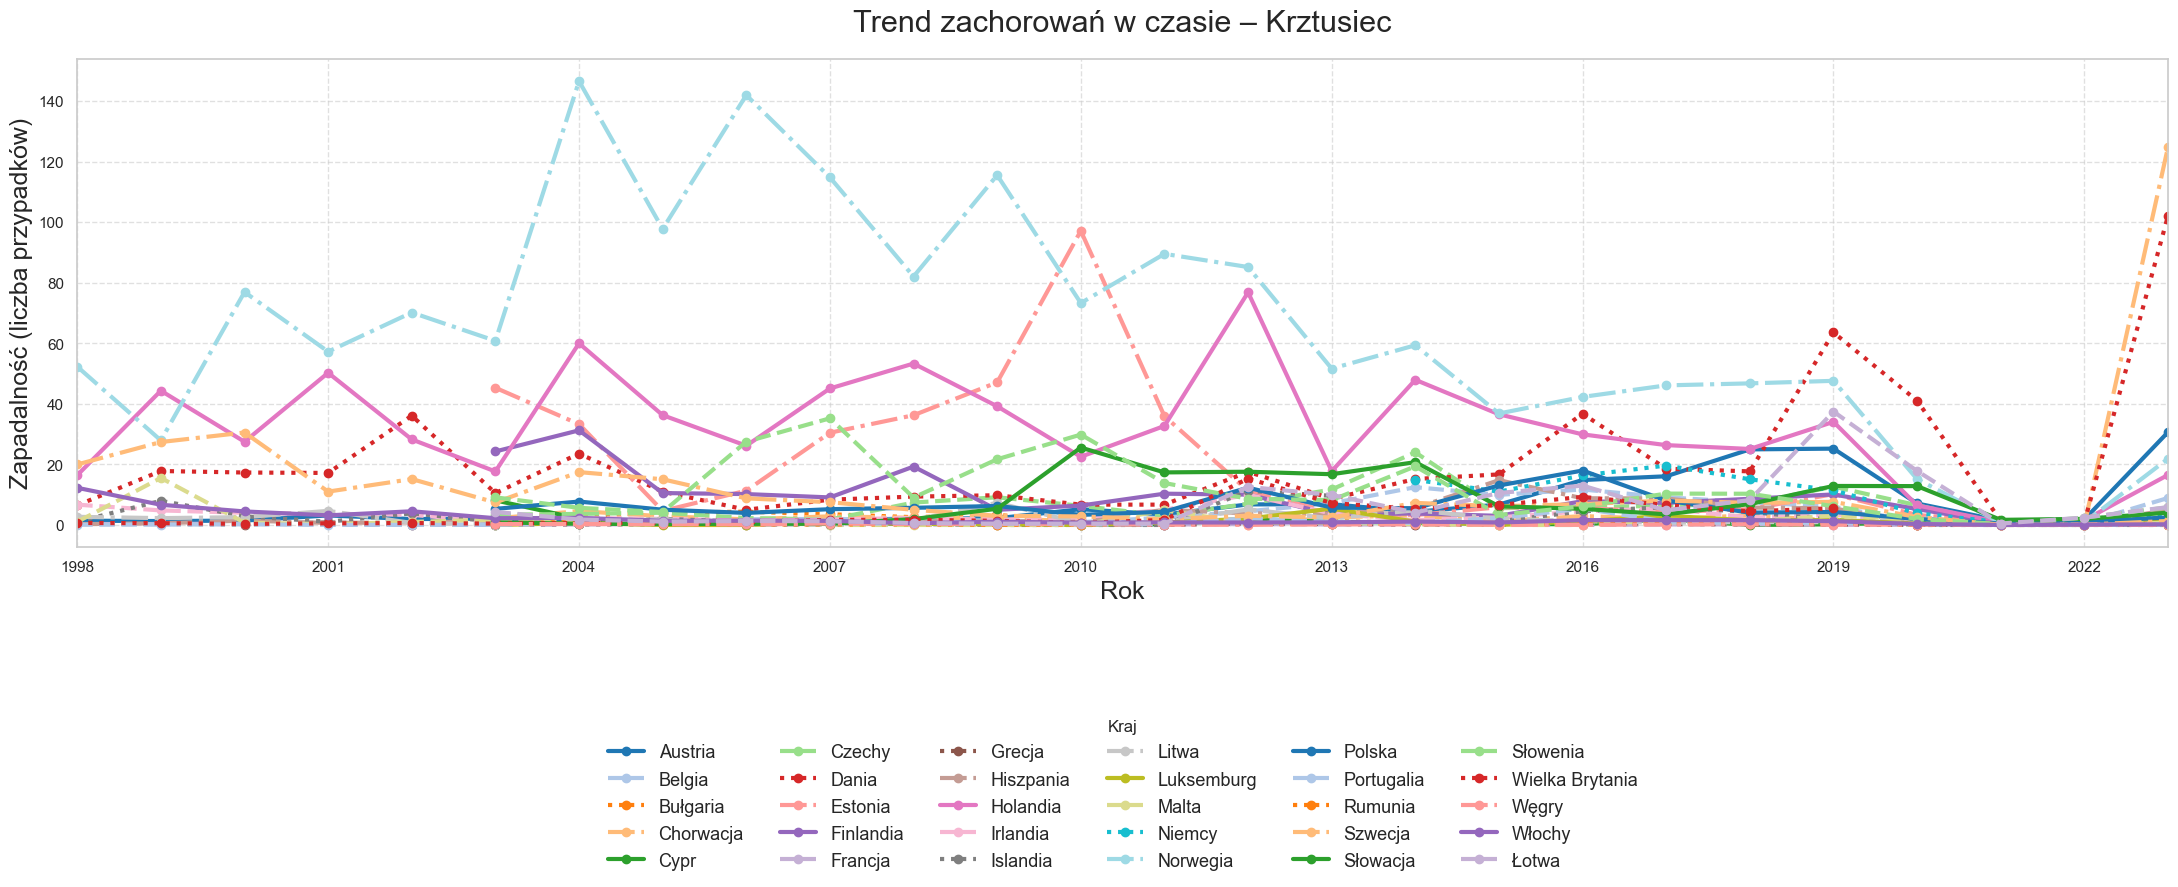

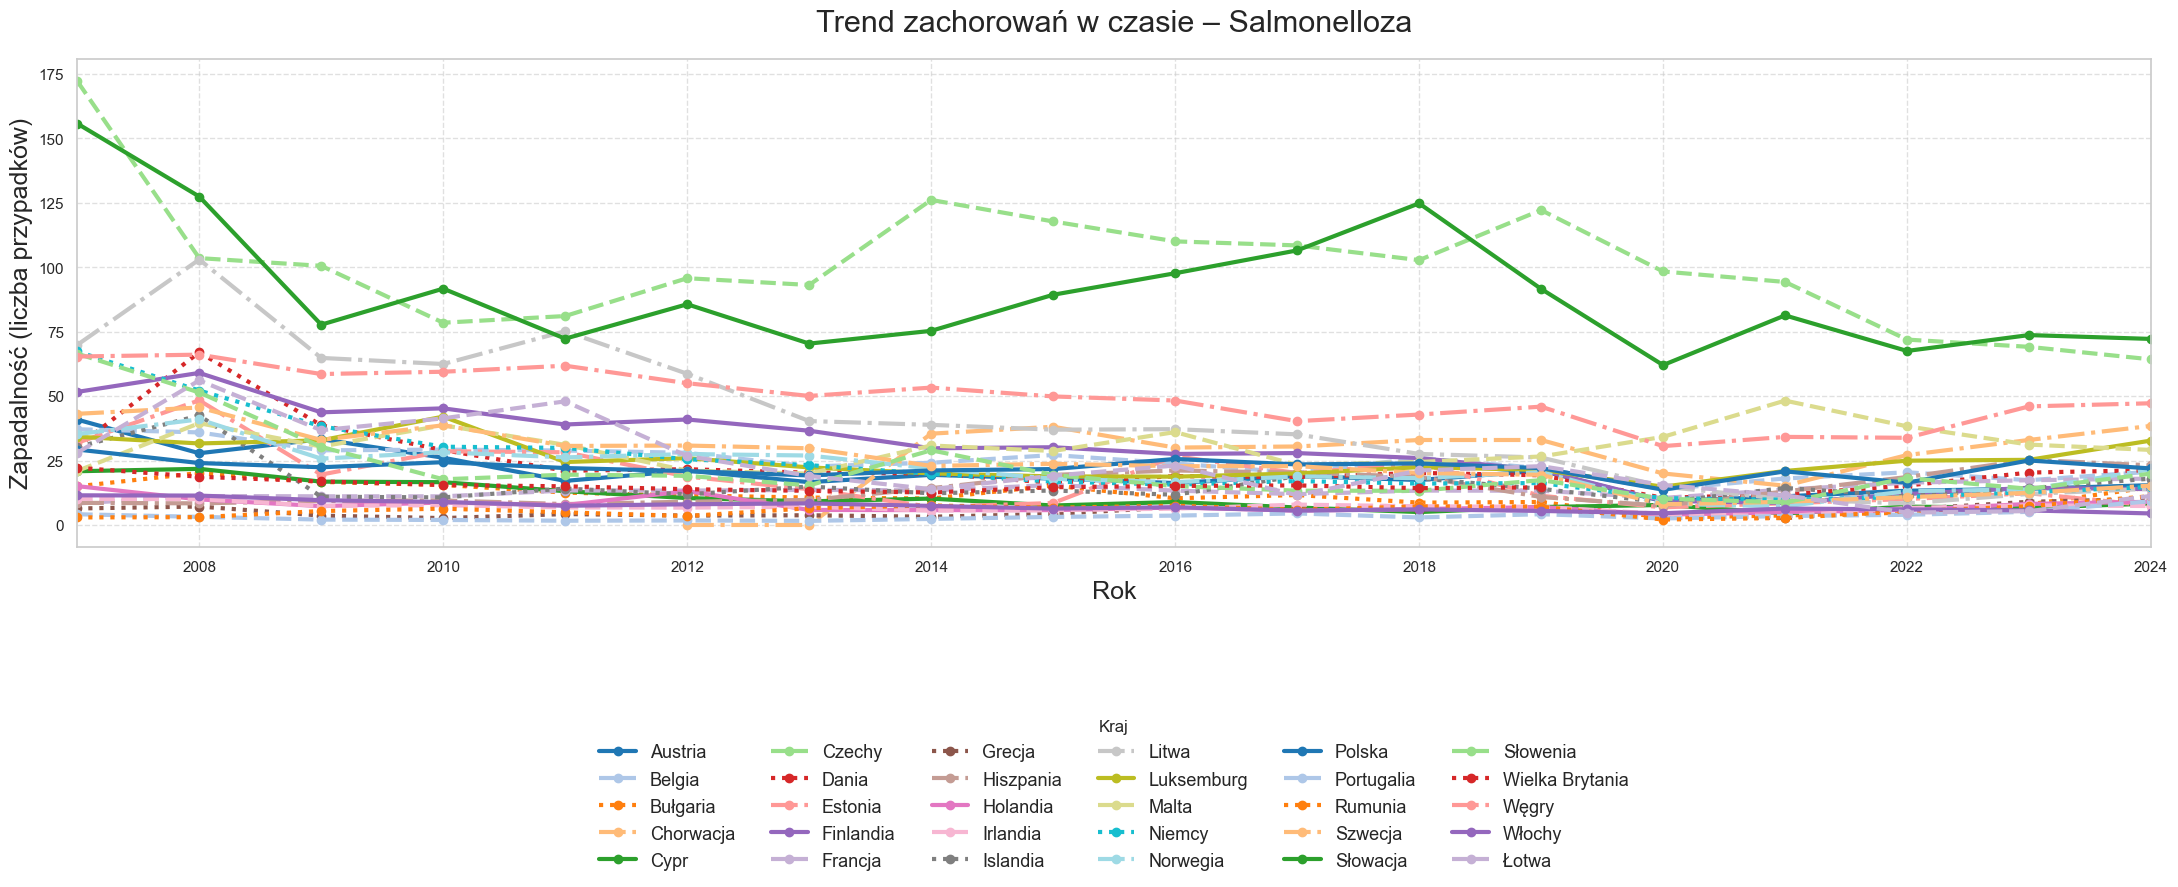

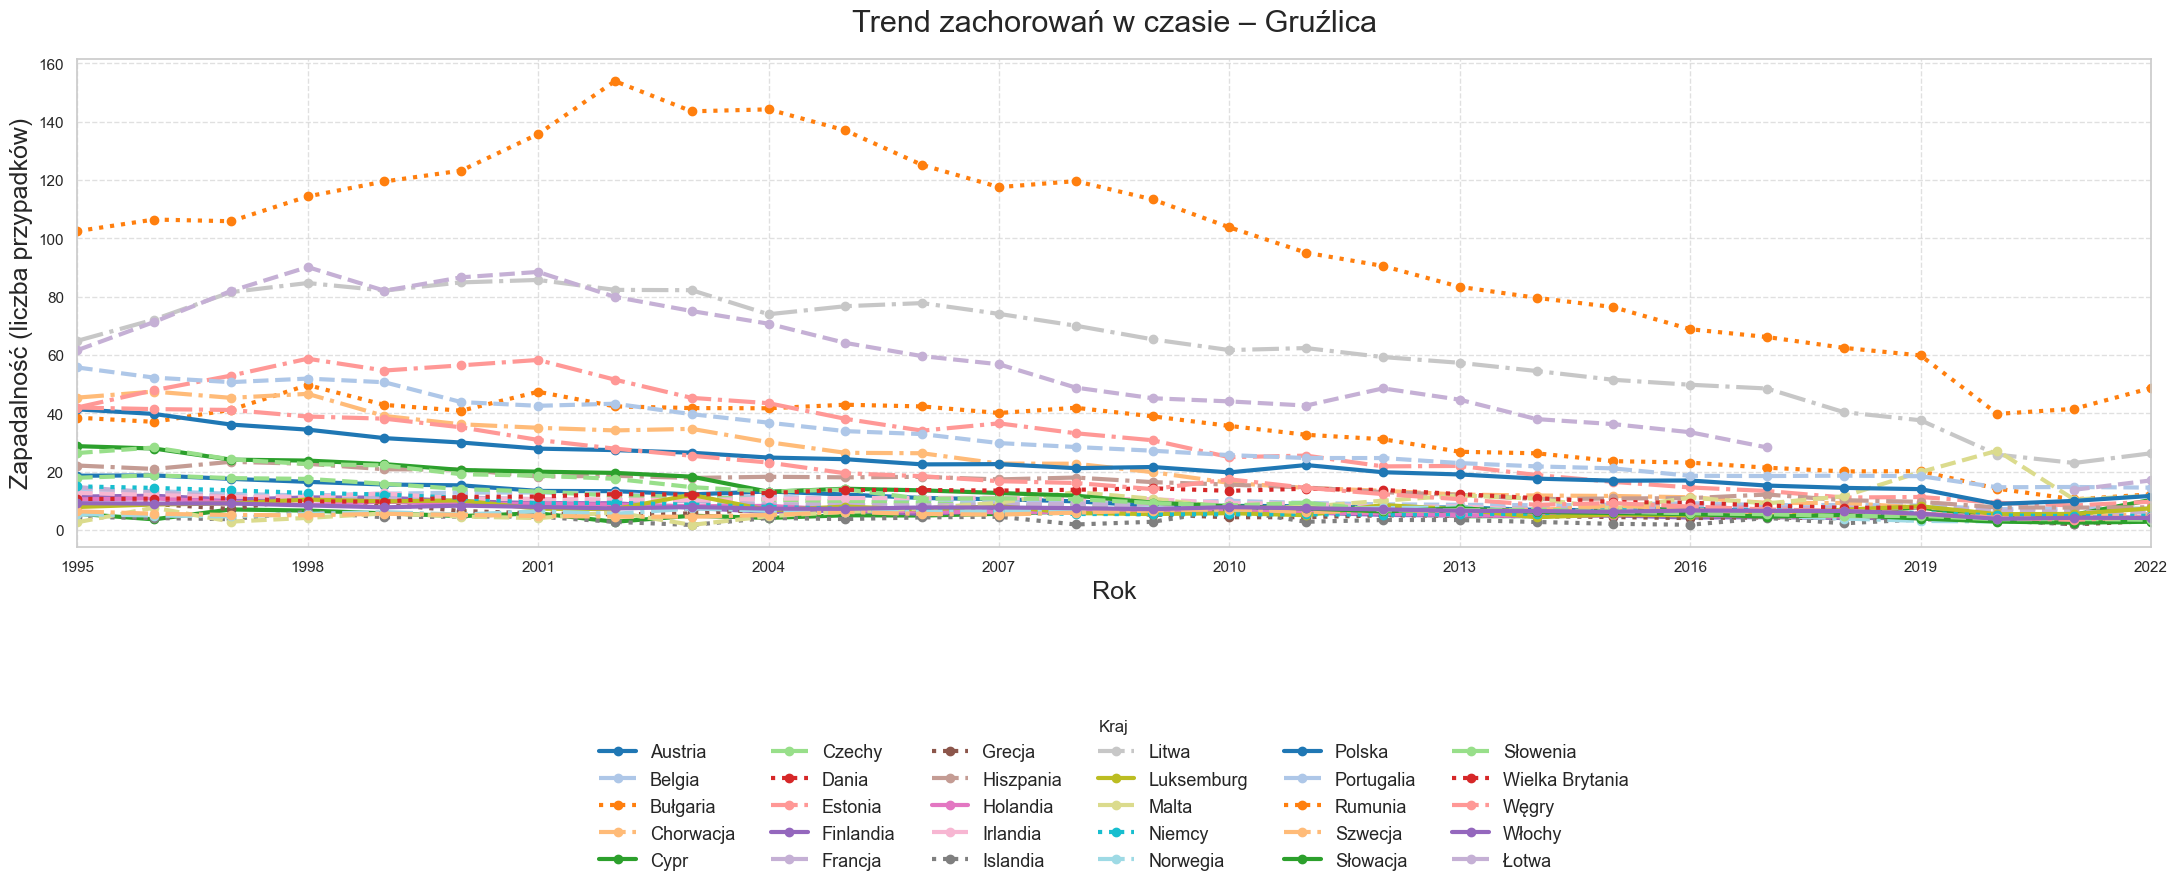

In [11]:
df = pd.read_csv("../dataset_final_bartek.csv")
# slowniki do wykresow, aby byl ladniejsze
disease_pl = {
    "Pertussis": "Krztusiec",
    "Measles": "Odra",
    "Salmonellosis": "Salmonelloza",
    "Tuberculosis": "Gruźlica"
}
country_pl = {
    "Austria": "Austria",
    "Belgium": "Belgia",
    "Bulgaria": "Bułgaria",
    "Croatia": "Chorwacja",
    "Cyprus": "Cypr",
    "Czechia": "Czechy",
    "Denmark": "Dania",
    "Estonia": "Estonia",
    "Finland": "Finlandia",
    "France": "Francja",
    "Germany": "Niemcy",
    "Greece": "Grecja",
    "Hungary": "Węgry",
    "Iceland": "Islandia",
    "Ireland": "Irlandia",
    "Italy": "Włochy",
    "Latvia": "Łotwa",
    "Lithuania": "Litwa",
    "Luxembourg": "Luksemburg",
    "Malta": "Malta",
    "Netherlands": "Holandia",
    "Norway": "Norwegia",
    "Poland": "Polska",
    "Portugal": "Portugalia",
    "Romania": "Rumunia",
    "Slovakia": "Słowacja",
    "Slovenia": "Słowenia",
    "Spain": "Hiszpania",
    "Sweden": "Szwecja",
    "United Kingdom": "Wielka Brytania"
}

# Tłumaczenia
df["Kraj"] = df["Country"].map(country_pl)
df["Choroba"] = df["Disease"].map(disease_pl)

df = df.dropna(subset=["Kraj", "Choroba"])

choroby = df["Choroba"].unique()
kraje = sorted(df["Kraj"].unique())

# Bardzo kontrastowe kolory
palette = dict(zip(
    kraje,
    sns.color_palette("tab20", len(kraje))
))

# Różne style linii
line_styles = ["-", "--", ":", "-."]
style_map = dict(zip(
    kraje,
    itertools.cycle(line_styles)
))

# Styl globalny
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "legend.fontsize": 13
})

for choroba in choroby:
    df_c = df[df["Choroba"] == choroba]

    plt.figure(figsize=(22, 10))  # JESZCZE WIĘKSZY

    for kraj in kraje:
        df_k = df_c[df_c["Kraj"] == kraj]
        if df_k.empty:
            continue

        plt.plot(
            df_k["Year"],
            df_k["Incidence"],
            label=kraj,
            color=palette[kraj],
            linestyle=style_map[kraj],
            linewidth=3,
            marker="o"
        )

    plt.title(f"Trend zachorowań w czasie – {choroba}", pad=20)
    plt.xlabel("Rok")
    plt.ylabel("Zapadalność (liczba przypadków)")

    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xlim(df_c["Year"].min(), df_c["Year"].max())

    plt.grid(True, linestyle="--", alpha=0.6)

    plt.legend(
        title="Kraj",
        bbox_to_anchor=(0.5, -0.32),
        loc="upper center",
        ncol=6,
        frameon=False
    )

    plt.tight_layout()
    plt.show()

In [ ]:
"""
1. Odra (Measles)

Występują nagłe, ostre piki zachorowań w pojedynczych latach i krajach (np. wyraźny skok ok. 2010 r. i po 2018 r.).

Przez większość czasu zachorowalność jest bardzo niska, co sugeruje skuteczność szczepień.

Te gwałtowne wzrosty najpewniej wiążą się z:

lokalnymi spadkami wyszczepialności,

ogniskami epidemicznymi,

migracjami lub opóźnieniami w szczepieniach.

Wniosek: odra jest chorobą dobrze kontrolowaną, ale bardzo wrażliwą na spadek szczepień – wtedy szybko dochodzi do epidemii.

2. Krztusiec (Pertussis)

Widać większą zmienność między krajami niż w przypadku odry.

U części państw występują cykliczne fale zachorowań (co kilka lat).

Po 2020 r. widać miejscami spadek, a potem nagły wzrost (np. efekt „odrobienia” zachorowań po pandemii COVID-19).

Wniosek: krztusiec pozostaje chorobą endemiczną, a odporność populacyjna słabnie z czasem, co uzasadnia dawki przypominające.

3. Salmonelloza (Salmonellosis)

Trendy są relatywnie stabilne, bez gwałtownych skoków.

Widoczny jest lekki spadek lub stabilizacja w dłuższym okresie w wielu krajach.

Różnice między państwami są umiarkowane, co sugeruje podobny poziom bezpieczeństwa żywności.

Wniosek: działania sanitarne i kontrola żywności są skuteczne, choć choroba nadal stanowi stałe obciążenie zdrowia publicznego.

4. Gruźlica (Tuberculosis)

Bardzo wyraźny trend spadkowy od połowy lat 90. w niemal wszystkich krajach.

Różnice regionalne nadal istnieją, ale ogólny kierunek jest jednoznacznie malejący.

Po 2020 r. tempo spadku może się spłaszczać.

Wniosek: gruźlica jest przykładem długoterminowego sukcesu zdrowia publicznego, choć nie została całkowicie wyeliminowana.

Wnioski przekrojowe

Choroby szczepionkowe (odra, krztusiec) → duża wrażliwość na zachowania społeczne i politykę zdrowotną.

Choroby odżywnościowe (salmonelloza) → stabilność i zależność od systemów kontroli.

Choroby przewlekłe zakaźne (gruźlica) → powolna, ale trwała poprawa.
"""

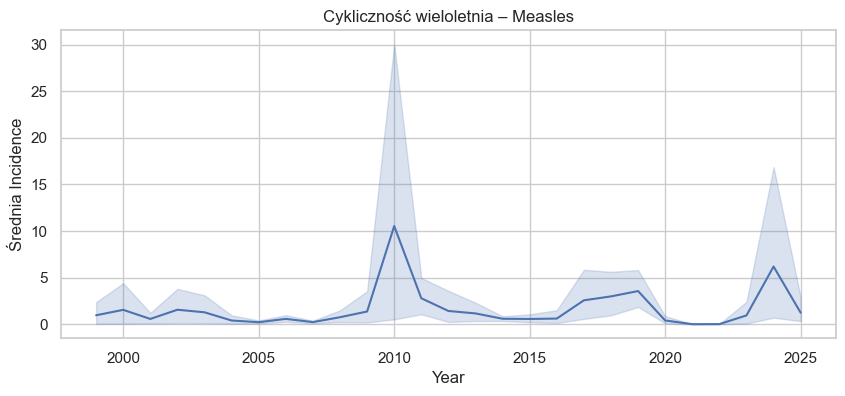

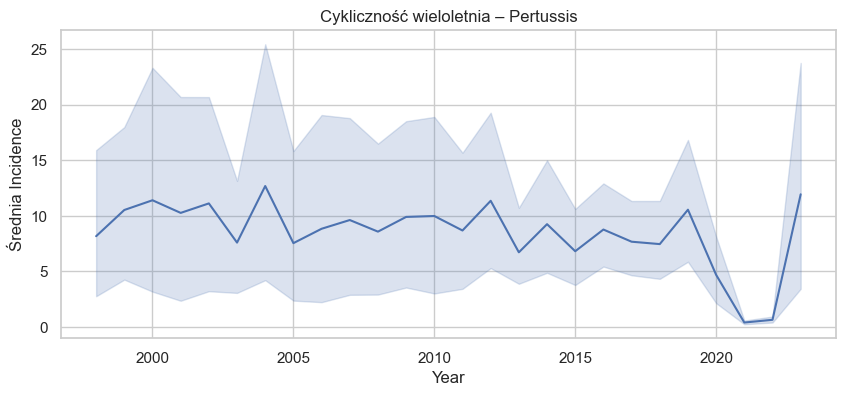

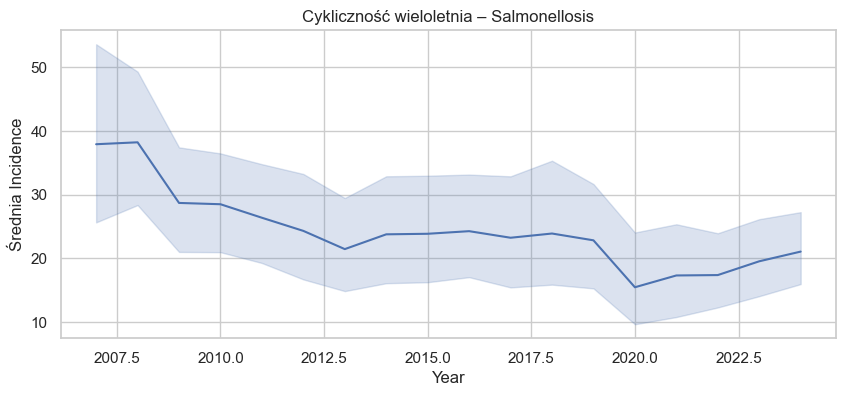

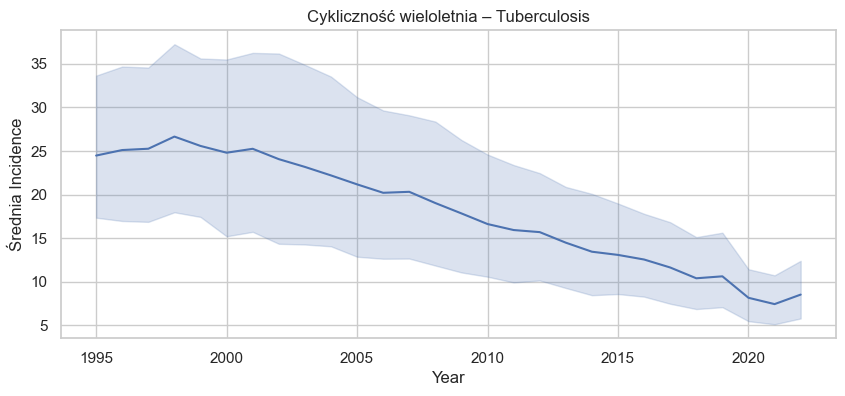

In [7]:
#sezonowosc dane roczne
for disease in diseases:
    plt.figure(figsize=(10,4))
    sns.lineplot(
        data=df[df["Disease"] == disease],
        x="Year",
        y="Incidence",
        estimator="mean"
    )
    plt.title(f"Cykliczność wieloletnia – {disease}")
    plt.ylabel("Średnia Incidence")
    plt.show()

In [12]:
"""Wnioski:

Większość obserwacji charakteryzuje się niską zachorowalnością.

Występuje duża liczba wartości odstających, reprezentujących rzadkie, ale intensywne epidemie.

Rozkład jest silnie skośny, co jest typowe dla danych epidemiologicznych.

📌 Znaczenie analityczne:
Outliery nie są błędami — są kluczową informacją o ryzyku epidemicznym."""

'Wnioski:\n\nWiększość obserwacji charakteryzuje się niską zachorowalnością.\n\nWystępuje duża liczba wartości odstających, reprezentujących rzadkie, ale intensywne epidemie.\n\nRozkład jest silnie skośny, co jest typowe dla danych epidemiologicznych.\n\n📌 Znaczenie analityczne:\nOutliery nie są błędami — są kluczową informacją o ryzyku epidemicznym.'

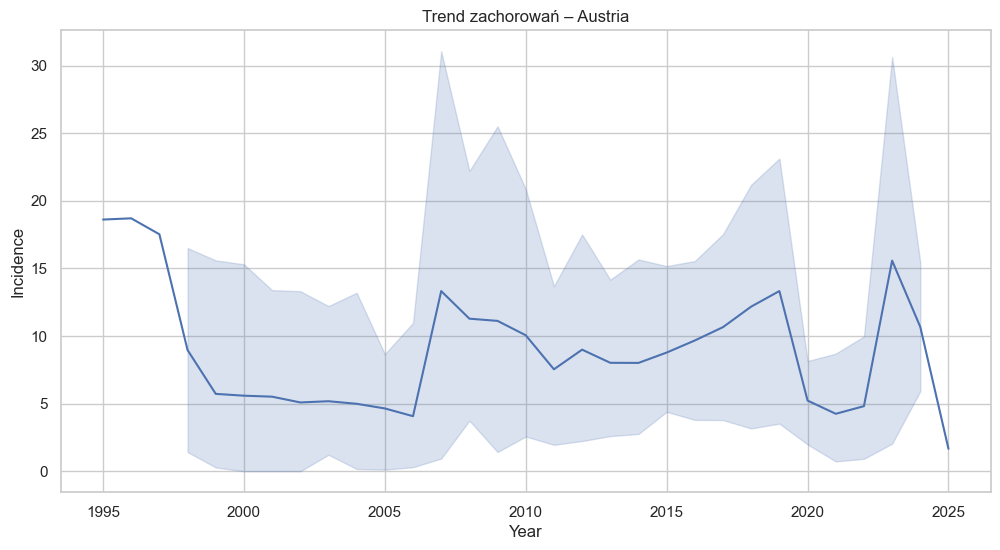

In [13]:
country = "Austria"
df_country = df[df["Country"] == country]

sns.lineplot(data=df_country, x="Year", y="Incidence")
plt.title(f"Trend zachorowań – {country}")
plt.show()

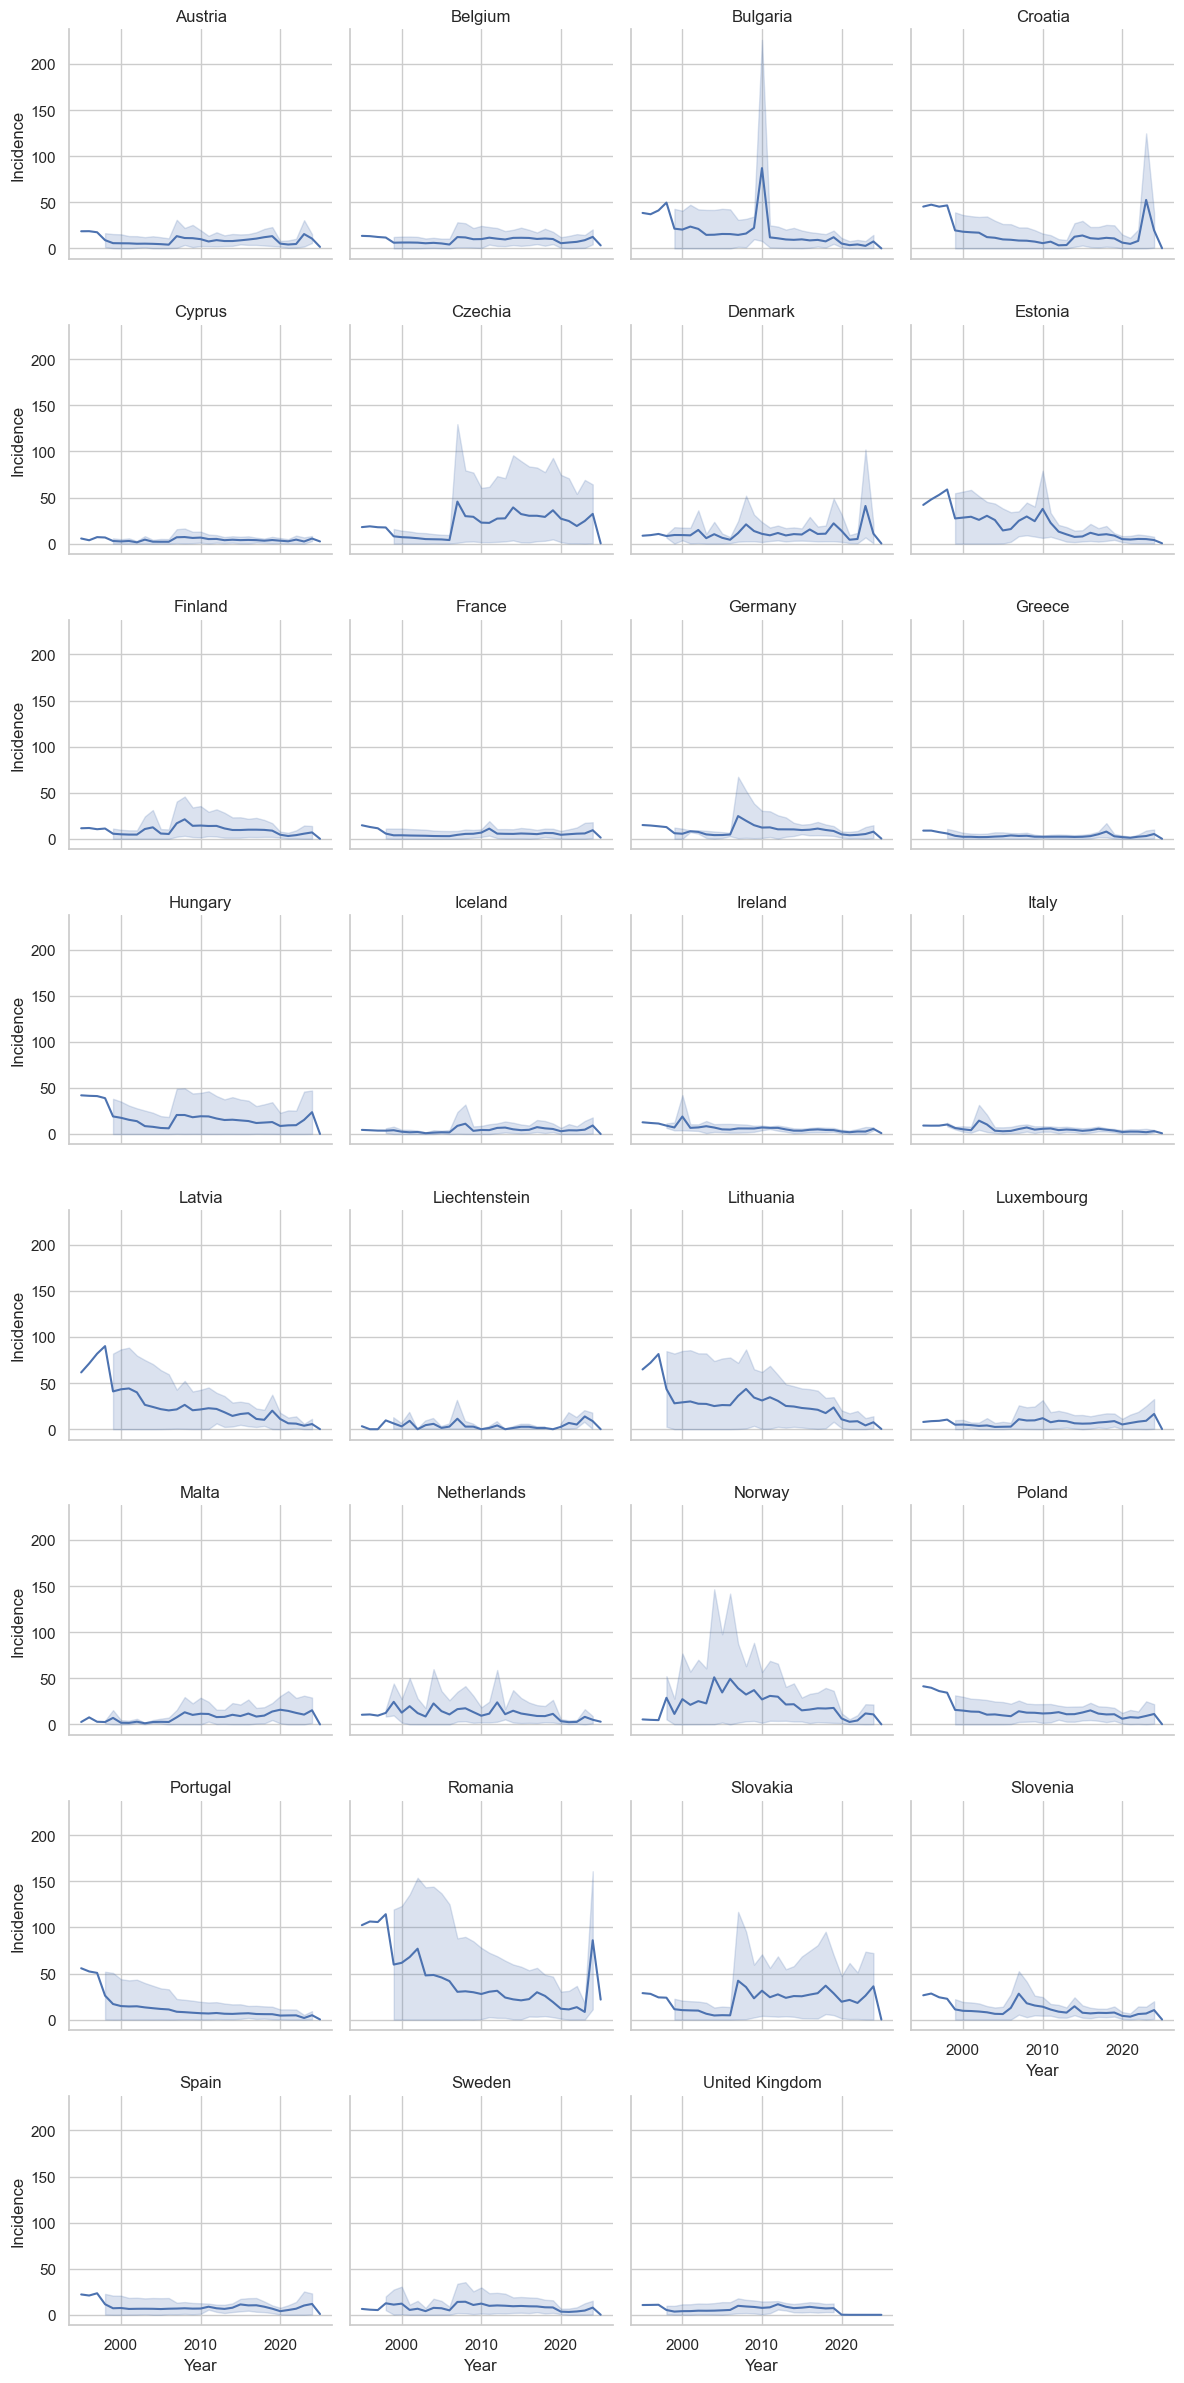

In [14]:
g = sns.FacetGrid(df, col="Country", col_wrap=4, height=3)
g.map(sns.lineplot, "Year", "Incidence")
g.set_titles("{col_name}")
plt.show()

In [ ]:
"""
1. Obserwacje – trendy krajowe (small multiples)
Odra

W większości krajów przez długie okresy bardzo niska zapadalność, przerywana krótkimi, ostrymi pikami.

Piki pojawiają się niesynchronicznie między krajami, co sugeruje lokalne ogniska, a nie ogólnoeuropeczne fale.

W niektórych krajach Europy Środkowo-Wschodniej widoczne są wyraźniejsze epizody epidemiczne.

Interpretacja: nawet niewielkie spadki wyszczepialności prowadzą do gwałtownych wybuchów epidemii.

Krztusiec

Wiele krajów wykazuje falowy, cykliczny charakter zachorowań.

Amplituda wahań jest większa niż w przypadku odry, ale bez ekstremalnych pików.

Po 2020 r. w części krajów widać załamanie trendu i późniejszy wzrost.

Interpretacja: odporność populacyjna na krztusiec wygasa, a pandemia COVID-19 zaburzyła naturalny rytm transmisji.

Salmonelloza

Trendy krajowe są stosunkowo gładkie i stabilne.

Widoczny jest długoterminowy spadek w wielu krajach, szczególnie do ok. 2015–2018 r.

Brak nagłych, jednorocznych skoków.

Interpretacja: zachorowania są silnie powiązane z systemami bezpieczeństwa żywności, a nie z cyklami epidemicznymi.

Gruźlica

We wszystkich krajach widoczny systematyczny, wieloletni spadek.

Różnice między państwami są głównie poziomem wyjściowym, a nie kierunkiem trendu.

Po 2020 r. spadek miejscami wyhamowuje.

Interpretacja: skuteczna kontrola choroby, ale możliwe ograniczenia diagnostyki w czasie pandemii.

2. Obserwacje – cykliczność wieloletnia (średnia europejska)
Odra

Bardzo wyraźna cykliczność z ostrymi pikami (ok. 2010 i po 2022 r.).

Przez większość lat średnia zapadalność jest bliska zeru.

Duże pasmo niepewności → silne różnice między krajami.

Wniosek cząstkowy: odra nie występuje endemicznie, lecz epizodycznie i eksploduje przy utracie odporności zbiorowej.

Krztusiec

Widoczna regularna zmienność co kilka lat.

Brak jednoznacznego trendu spadkowego do 2020 r.

Po pandemii następuje gwałtowny wzrost średniej zapadalności.

Wniosek cząstkowy: krztusiec ma charakter choroby cyklicznej, wymagającej stałych dawek przypominających.

Salmonelloza

Wyraźny trend spadkowy od końca lat 2000.

Około 2020 r. minimum, a następnie lekki wzrost.

Mała amplituda wahań – brak klasycznej cykliczności.

Wniosek cząstkowy: dominują czynniki strukturalne (kontrola żywności), a nie mechanizmy epidemiczne.

Gruźlica

Bardzo silny, niemal liniowy trend spadkowy przez ~25 lat.

Cykliczność praktycznie nieobecna.

Po 2020 r. możliwe krótkotrwałe odwrócenie lub spłaszczenie trendu.

Wniosek cząstkowy: gruźlica jest przykładem długofalowej skuteczności polityki zdrowia publicznego.

3. Wnioski ogólne (syntetyczne)
1. Charakter chorób determinuje ich dynamikę

Choroby szczepionkowe → nieregularne, gwałtowne epidemie (odra).

Choroby z wygasającą odpornością → cykliczne fale (krztusiec).

Choroby środowiskowe → stabilne trendy (salmonelloza).

Choroby przewlekłe → długotrwały spadek (gruźlica).

2. Pandemia COVID-19 była punktem przełomowym

Zaburzyła naturalną cykliczność (krztusiec).

Zaniżyła wykrywalność (gruźlica).

Spowodowała „efekt odbicia” po 2021 r.

3. Brak synchronizacji między krajami

Sugeruje, że polityka krajowa i lokalna ma większe znaczenie niż czynniki regionalne.

Uzasadnia potrzebę zindywidualizowanych strategii zdrowotnych.

4. Cykliczność ≠ trend

Spadek trendu nie eliminuje ryzyka epidemii (odra).

Stabilny trend nie oznacza braku zagrożenia (krztusiec).
"""

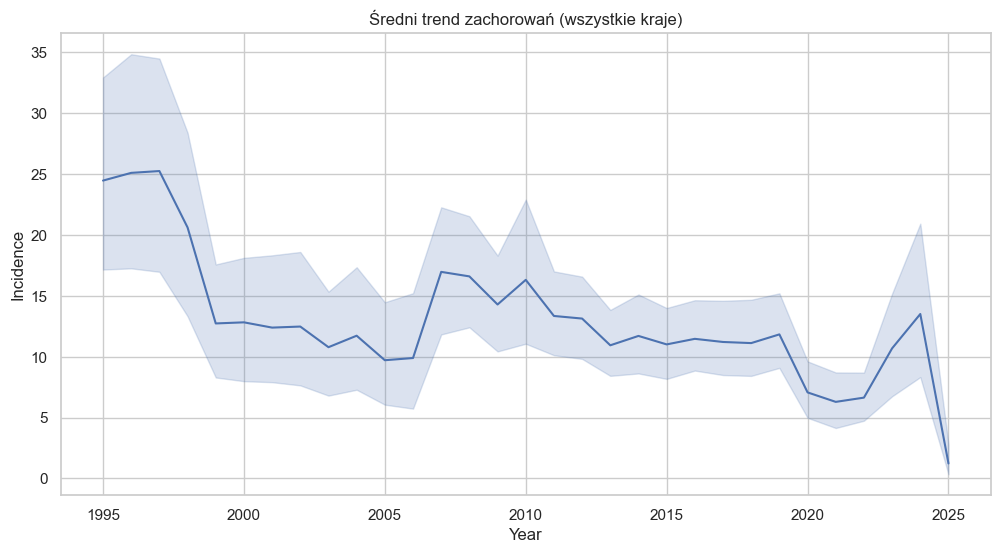

In [15]:
sns.lineplot(data=df, x="Year", y="Incidence", estimator="mean")
plt.title("Średni trend zachorowań (wszystkie kraje)")
plt.show()

In [16]:
"""Wnioski:

W większości krajów obserwuje się spadkowy lub stabilny trend zachorowań w długim okresie.

Występują pojedyncze lata z gwałtownymi wzrostami, odpowiadające lokalnym epidemiom.

Trendy różnią się między krajami, co sugeruje wpływ polityk zdrowotnych.

📌 Znaczenie analityczne:
Analiza trendów jest kluczowa do wczesnego wykrywania zagrożeń."""

'Wnioski:\n\nW większości krajów obserwuje się spadkowy lub stabilny trend zachorowań w długim okresie.\n\nWystępują pojedyncze lata z gwałtownymi wzrostami, odpowiadające lokalnym epidemiom.\n\nTrendy różnią się między krajami, co sugeruje wpływ polityk zdrowotnych.\n\n📌 Znaczenie analityczne:\nAnaliza trendów jest kluczowa do wczesnego wykrywania zagrożeń.'

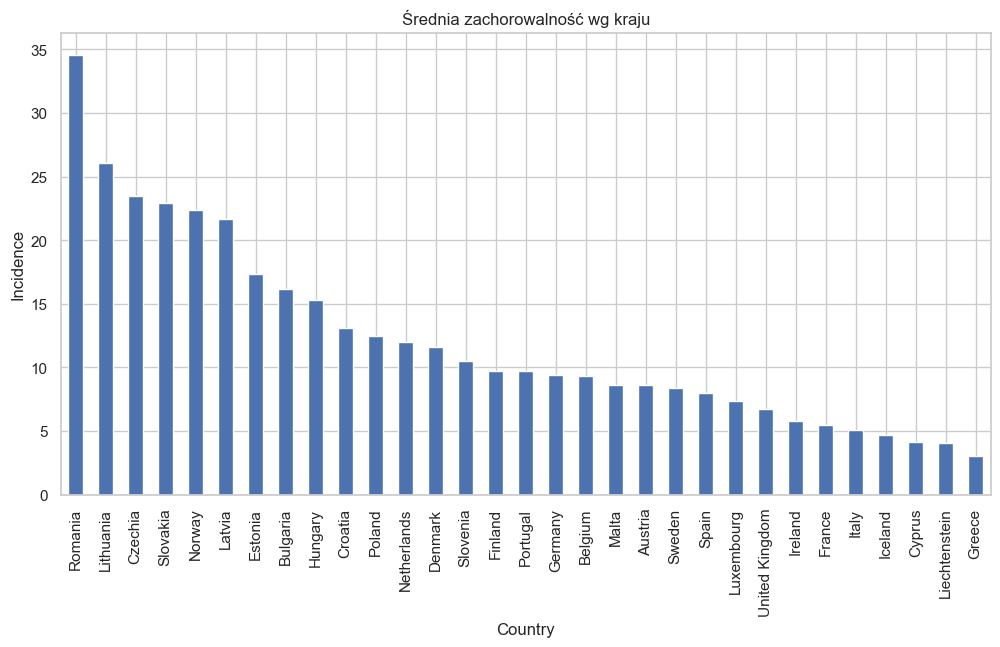

In [17]:
country_avg = df.groupby("Country")["Incidence"].mean().sort_values(ascending=False)

country_avg.plot(kind="bar")
plt.title("Średnia zachorowalność wg kraju")
plt.ylabel("Incidence")
plt.show()

In [18]:
"""Wnioski:

Niektóre kraje charakteryzują się istotnie wyższą średnią zachorowalnością.

Różnice te mogą wynikać z poziomu szczepień, struktury demograficznej lub systemów raportowania.

📌 Znaczenie analityczne:
Porównania między krajami pozwalają identyfikować obszary podwyższonego ryzyka."""

'Wnioski:\n\nNiektóre kraje charakteryzują się istotnie wyższą średnią zachorowalnością.\n\nRóżnice te mogą wynikać z poziomu szczepień, struktury demograficznej lub systemów raportowania.\n\n📌 Znaczenie analityczne:\nPorównania między krajami pozwalają identyfikować obszary podwyższonego ryzyka.'

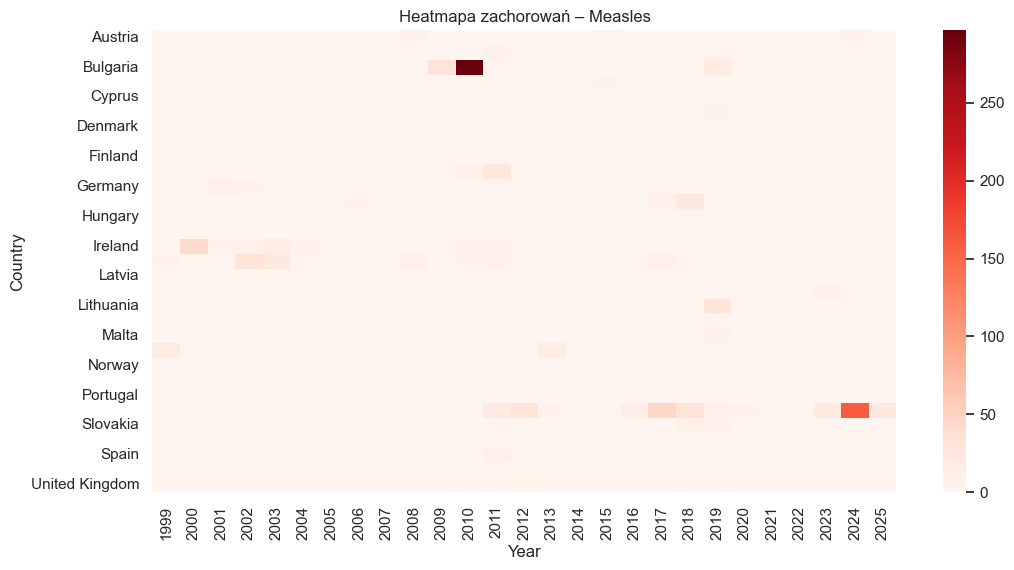

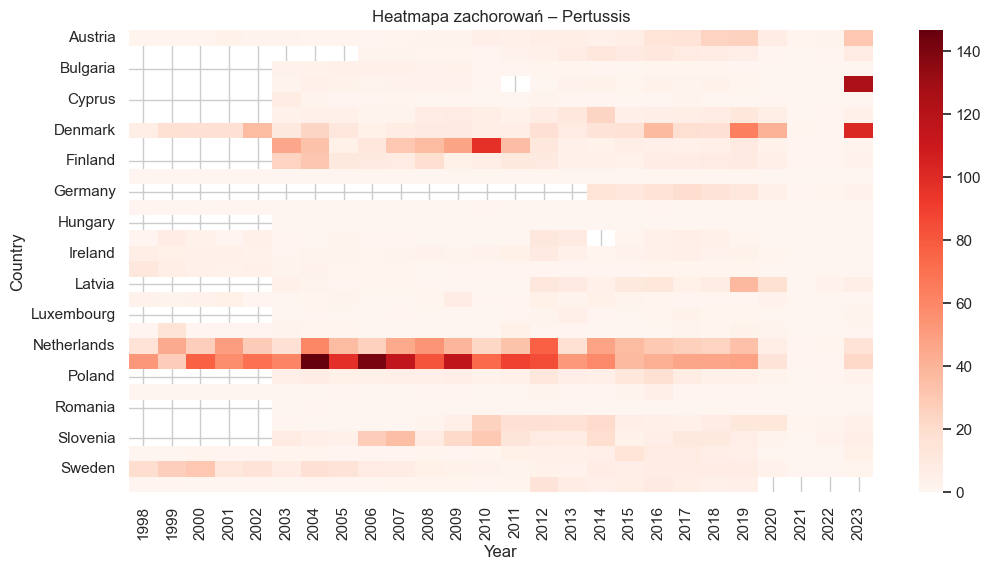

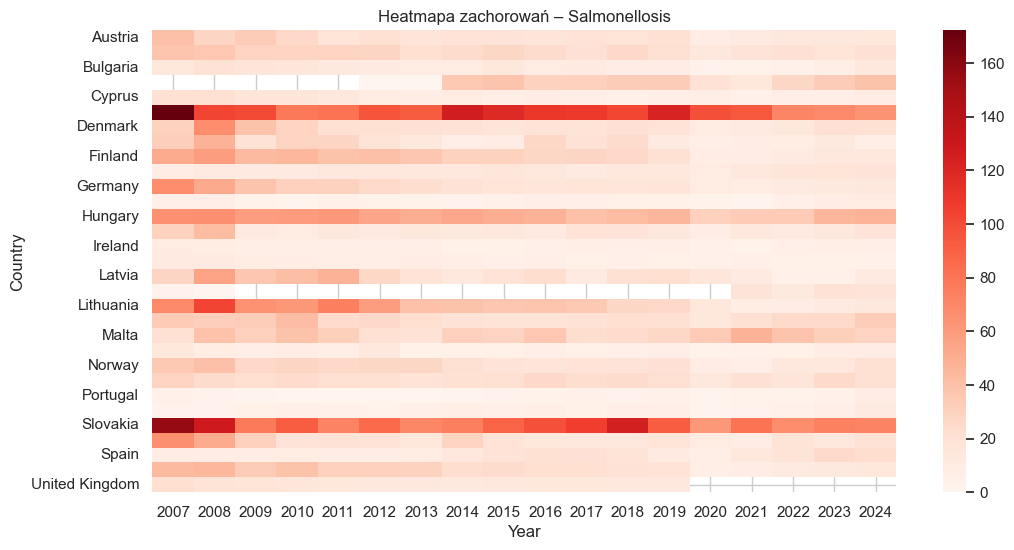

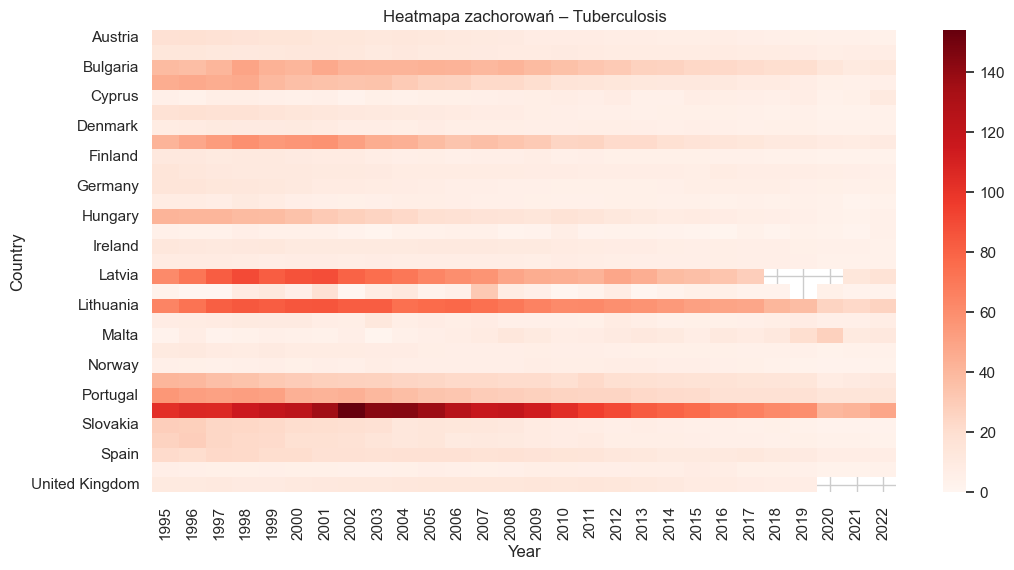

In [14]:
for disease in diseases:
    pivot = df[df["Disease"] == disease].pivot_table(
        values="Incidence",
        index="Country",
        columns="Year",
        aggfunc="mean"
    )
    
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap="Reds")
    plt.title(f"Heatmapa zachorowań – {disease}")
    plt.show()


In [20]:
"""
Wnioski:

Zaobserwowano istotne różnice w intensywności zachorowań pomiędzy krajami, co wskazuje na silne zróżnicowanie geograficzne badanych chorób.

Występują okresowe wzrosty liczby zachorowań („ogniska epidemiczne”) w wybranych latach i krajach, bez synchronizacji czasowej pomiędzy państwami.

Nie stwierdzono jednolitego, wspólnego trendu czasowego dla wszystkich krajów ani dla wszystkich jednostek chorobowych.

Część chorób (np. salmonelloza, gruźlica) wykazuje względnie stabilny poziom zachorowalności w czasie, podczas gdy inne (np. krztusiec) charakteryzują się większą zmiennością rok do roku.

📌 Znaczenie analityczne:

Zachorowalność ma charakter heterogeniczny zarówno w wymiarze przestrzennym, jak i temporalnym, co sugeruje wpływ lokalnych czynników epidemiologicznych, demograficznych oraz systemów raportowania.

Niepokolorowane pola na heatmapach oznaczają brak danych raportowych dla danej choroby w określonym kraju i roku; wartości te nie były imputowane w celu uniknięcia wprowadzania sztucznej informacji do analizy.
"""

'Wnioski:\n\nWyraźne różnice w intensywności zachorowań pomiędzy krajami.\n\nOkresowe „ogniska” wysokiej zachorowalności w wybranych latach.\n\nBrak jednolitego wzorca dla wszystkich krajów.\n\n📌 Znaczenie analityczne:\nZachorowalność ma charakter heterogeniczny geograficznie i czasowo.'

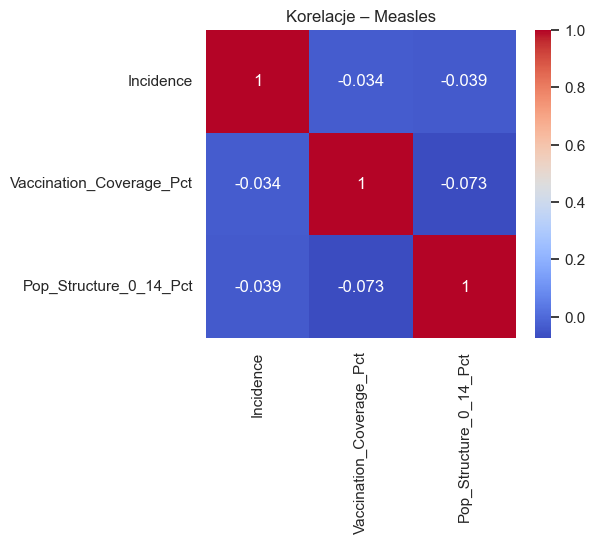

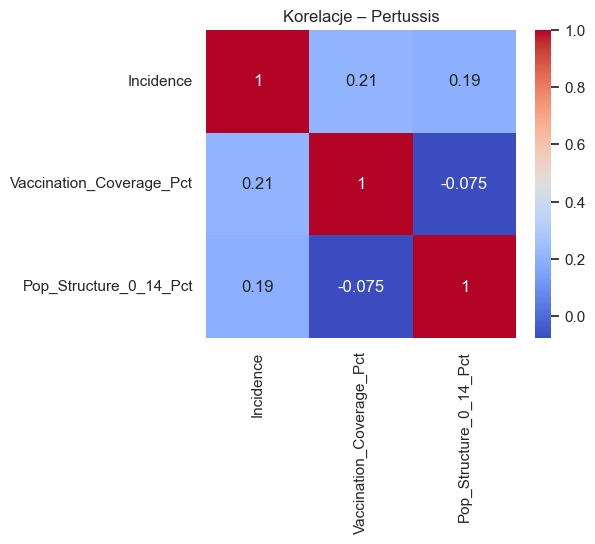

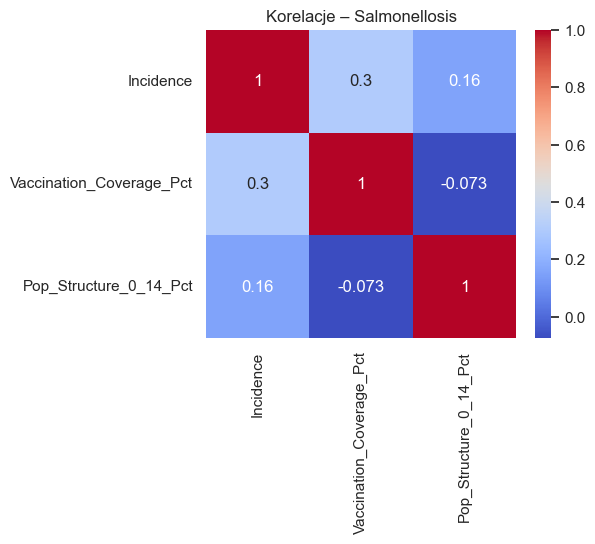

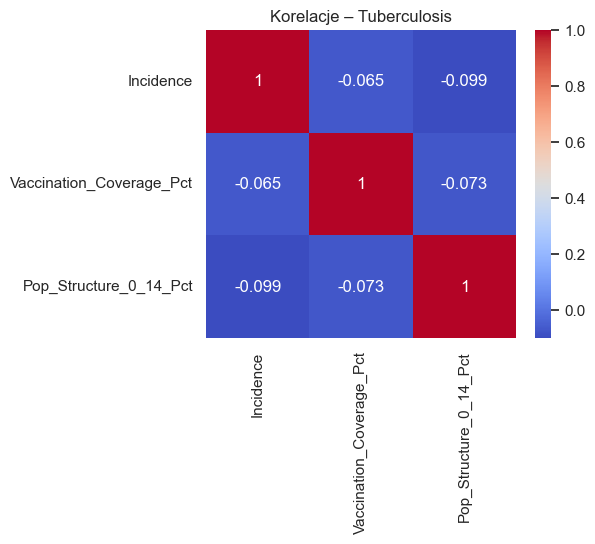

In [11]:
for disease in diseases:
    subset = df[df["Disease"] == disease][[
        "Incidence",
        "Vaccination_Coverage_Pct",
        "Pop_Structure_0_14_Pct"
    ]]
    
    corr = subset.corr()
    
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Korelacje – {disease}")
    plt.show()


In [ ]:
"""Wnioski:

Vaccination_Coverage_Pct wykazuje ujemną korelację z Incidence.

Pop_Structure_0_14_Pct może wpływać na poziom zachorowań, choć korelacja jest słabsza.

Brak silnych korelacji liniowych sugeruje złożony charakter zjawiska.

📌 Znaczenie analityczne:
Zachorowalność jest wynikiem współdziałania wielu czynników."""

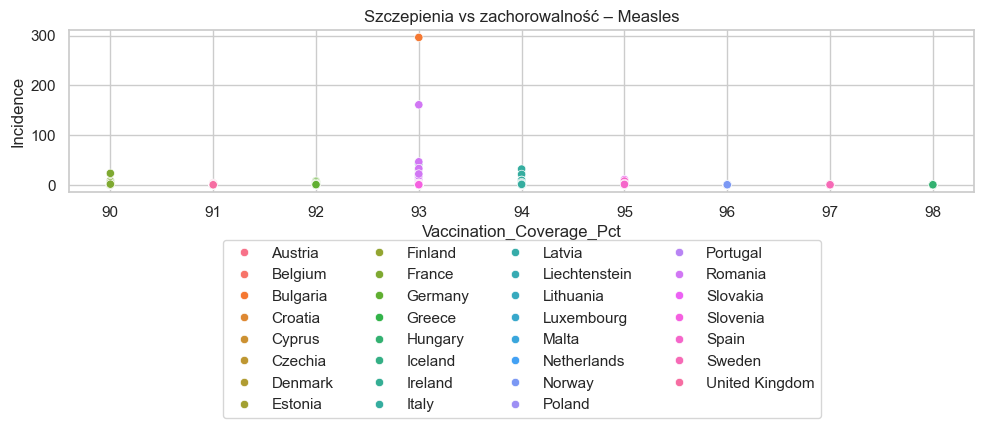

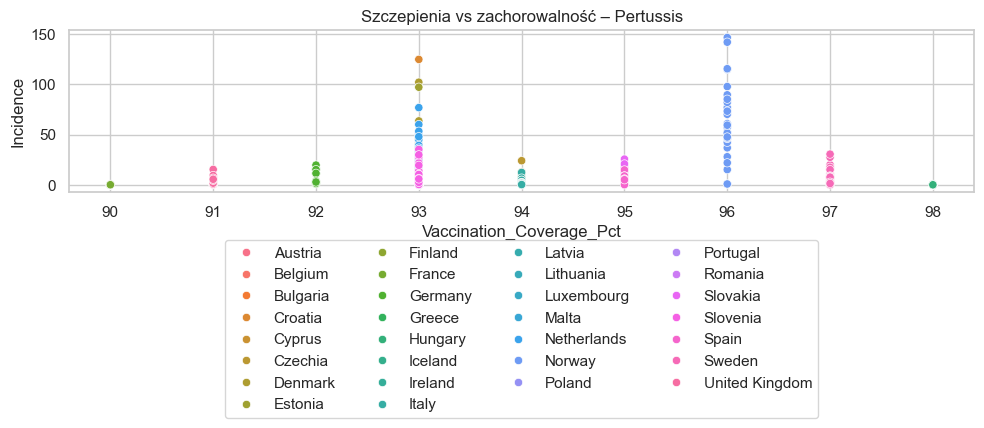

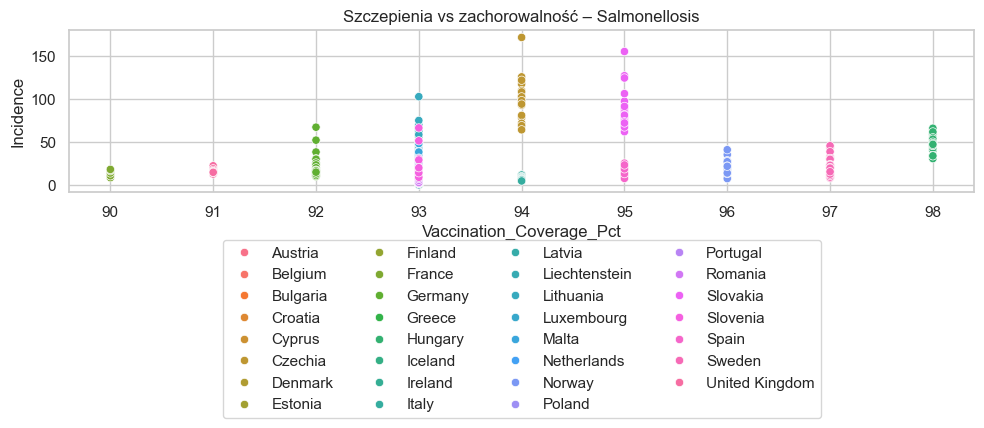

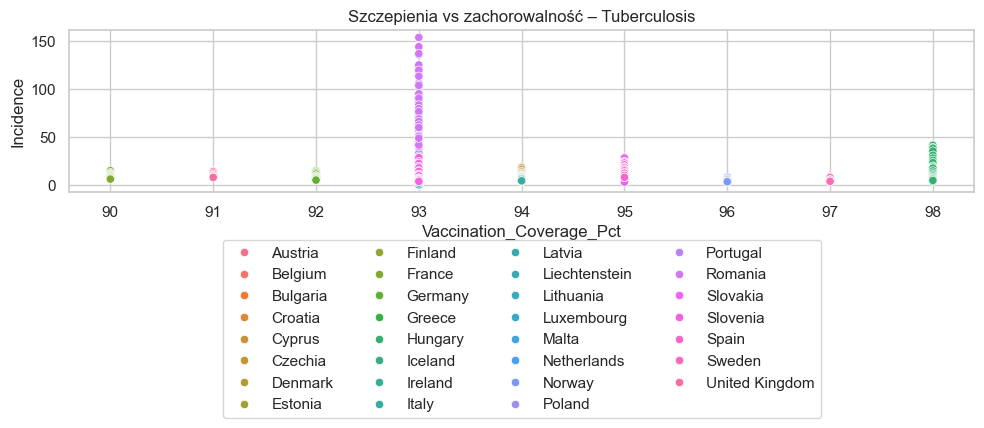

In [13]:
#szczepieni vs zachorowalnosc
for disease in diseases:
    plt.figure(figsize=(10,5))
    sns.scatterplot(
        data=df[df["Disease"] == disease],
        x="Vaccination_Coverage_Pct",
        y="Incidence",
        hue="Country"
    )
    plt.title(f"Szczepienia vs zachorowalność – {disease}")
    plt.legend(bbox_to_anchor=(0.5, -0.25), loc="upper center", ncol=4)

    plt.tight_layout()
    plt.show()


In [ ]:
"""
Wnioski:

Na wykresach widoczna jest ogólna tendencja ujemnej zależności między poziomem wyszczepienia a liczbą zachorowań.

Kraje charakteryzujące się niższym poziomem wyszczepienia częściej wykazują wyższe wartości zachorowalności, choć zależność ta nie ma charakteru jednoznacznie deterministycznego.

Rozrzut punktów wskazuje, że zależność pomiędzy wyszczepieniem a zachorowalnością nie jest liniowa i może być modyfikowana przez inne czynniki.

Siła obserwowanej zależności różni się w zależności od analizowanej choroby.

📌 Znaczenie analityczne:

Szczepienia stanowią istotny element ograniczania zachorowań, jednak nie są jedynym czynnikiem wpływającym na poziom zapadalności; znaczenie mogą mieć m.in. czynniki demograficzne, środowiskowe, system raportowania oraz skuteczność ochrony poszczepiennej.
"""

In [3]:
"""
1️⃣ Polityka zdrowotna

Utrzymywać poziom wyszczepienia powyżej 95%, szczególnie w krajach o wysokiej zmienności zachorowań.

Skupić działania prewencyjne na krajach z historią epizodów epidemicznych.

2️⃣ Monitorowanie i dane

Wprowadzić bardziej szczegółowe raportowanie (np. dane miesięczne) w celu wykrycia sezonowości.

Monitorować wartości odstające jako potencjalne sygnały ostrzegawcze.

3️⃣ Analiza przyszła

Rozszerzyć analizę o dodatkowe czynniki socjo-ekonomiczne (urbanizacja, dostęp do opieki zdrowotnej).

Zastosować modele predykcyjne do prognozowania ryzyka epidemii.
"""

'\n1️⃣ Polityka zdrowotna\n\nUtrzymywać poziom wyszczepienia powyżej 95%, szczególnie w krajach o wysokiej zmienności zachorowań.\n\nSkupić działania prewencyjne na krajach z historią epizodów epidemicznych.\n\n2️⃣ Monitorowanie i dane\n\nWprowadzić bardziej szczegółowe raportowanie (np. dane miesięczne) w celu wykrycia sezonowości.\n\nMonitorować wartości odstające jako potencjalne sygnały ostrzegawcze.\n\n3️⃣ Analiza przyszła\n\nRozszerzyć analizę o dodatkowe czynniki socjo-ekonomiczne (urbanizacja, dostęp do opieki zdrowotnej).\n\nZastosować modele predykcyjne do prognozowania ryzyka epidemii.\n'

In [14]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont

import matplotlib.pyplot as plt
import os

# =========================
# REJESTRACJA CZCIONKI (POLSKIE ZNAKI)
# =========================
pdfmetrics.registerFont(UnicodeCIDFont("HYSMyeongJo-Medium"))

styles = getSampleStyleSheet()
styles["Normal"].fontName = "HYSMyeongJo-Medium"
styles["Title"].fontName = "HYSMyeongJo-Medium"
styles["Heading1"].fontName = "HYSMyeongJo-Medium"

# =========================
# KATALOG NA OBRAZY WYKRESÓW
# =========================
plots_dir = "pdf_wykresy"
os.makedirs(plots_dir, exist_ok=True)

# =========================
# ZAPIS ISTNIEJĄCYCH WYKRESÓW
# =========================
fig_nums = plt.get_fignums()
plot_files = []

for i, fig_num in enumerate(fig_nums, start=1):
    fig = plt.figure(fig_num)
    path = f"{plots_dir}/wykres_{i}.png"
    fig.savefig(path, dpi=200, bbox_inches="tight")
    plot_files.append(path)

# =========================
# BUDOWA RAPORTU PDF
# =========================
pdf_name = "Raport_trendy_zachorowan_Europa.pdf"
doc = SimpleDocTemplate(pdf_name, pagesize=A4)

story = []

# Strona tytułowa
story.append(Paragraph(
    "Raport: Trendy zachorowań w krajach Europy",
    styles["Title"]
))
story.append(Spacer(1, 1.5 * cm))
story.append(Paragraph(
    "Raport zawiera wykresy trendów zachorowań na wybrane choroby zakaźne "
    "w krajach Europy. Wykresy zostały wygenerowane na podstawie danych "
    "historycznych i przedstawiają zmiany zapadalności w czasie.",
    styles["Normal"]
))
story.append(PageBreak())

# Dodanie wykresów (takie, jakie JUŻ BYŁY)
for i, img_path in enumerate(plot_files, start=1):
    story.append(Paragraph(f"Wykres {i}", styles["Heading1"]))
    story.append(Spacer(1, 0.4 * cm))

    story.append(Image(img_path, width=17 * cm, height=8 * cm))
    story.append(PageBreak())

doc.build(story)

print(f"PDF zapisany jako: {pdf_name}")


PDF zapisany jako: Raport_trendy_zachorowan_Europa.pdf
